In [1]:
# Dependencies and set-up
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import warnings
warnings.filterwarnings("ignore")


from sqlalchemy import create_engine

from config import (user, password, host, port, database)

In [2]:
# Create engine
engine = create_engine(f'postgresql://{user}:{password}@{host}:{port}/{database}')
conn = engine.connect()

In [3]:
# Read and view 'employees' table
sql_employee_data = pd.read_sql("select * from employees", conn)
sql_employee_data.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18


In [4]:
# Read and view 'salaries' table
sql_salary_data = pd.read_sql("select * from salaries", conn)
sql_salary_data.head()

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


In [5]:
# Combine and view 'employees' and 'salaries' tables
combined_data = pd.merge(sql_employee_data, sql_salary_data, on="emp_no", how="inner")
combined_data.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,salary
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,40000
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07,53422
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21,48973
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,40000
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18,40000


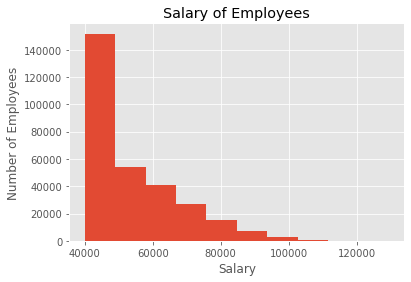

52970.732451403885
48681.0
0    40000
dtype: int64


In [6]:
plt.style.use('ggplot')
plt.hist(combined_data['salary'])
plt.xlabel('Salary')
plt.ylabel('Number of Employees')
plt.title('Salary of Employees')

plt.show()
print(combined_data['salary'].mean())
print(combined_data['salary'].median())
print(combined_data['salary'].mode())

In [7]:
# Read and view 'titles' table
sql_title_data = pd.read_sql("select * from titles", conn)
sql_title_data

,title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer
5,e0004,Technique Leader
6,m0001,Manager


In [8]:
sql_title_rename = sql_title_data.rename(columns = {"title_id": "emp_title_id"})
sql_title_rename

,emp_title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer
5,e0004,Technique Leader
6,m0001,Manager


In [9]:
avg_salary = combined_data.groupby('emp_title_id')['salary'].mean().round(2)
avg_salary

emp_title_id
e0001    48564.43
e0002    48535.34
e0003    48506.80
e0004    48582.90
m0001    51531.04
s0001    58465.38
s0002    58550.17
Name: salary, dtype: float64

In [10]:
# Combine and view 'sql_title_rename' and 'avg_salary' tables
avg_salary_title_data = pd.merge(sql_title_rename, avg_salary, on="emp_title_id", how="inner")
avg_salary_title_data

,emp_title_id,title,salary
0,s0001,Staff,58465.38
1,s0002,Senior Staff,58550.17
2,e0001,Assistant Engineer,48564.43
3,e0002,Engineer,48535.34
4,e0003,Senior Engineer,48506.80
5,e0004,Technique Leader,48582.90
6,m0001,Manager,51531.04


In [11]:
# Set x axis and tick locations
x_axis = np.arange(len(avg_salary_title_data))
tick_locations = [value for value in x_axis]

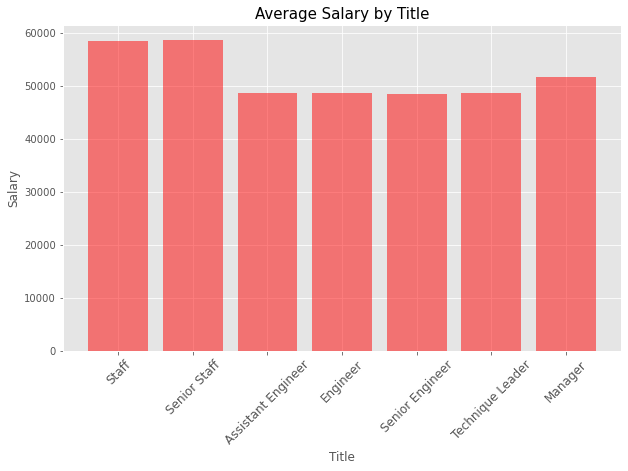

In [12]:
# Bar chart of average salary by title

plt.figure(figsize=(10, 6))
plt.bar(x_axis, avg_salary_title_data["salary"], color='r', alpha=0.5, align = "center")
plt.xticks(tick_locations, avg_salary_title_data["title"], rotation="45", fontsize=12)
plt.title("Average Salary by Title", fontsize=15)
plt.xlabel("Title")
plt.ylabel("Salary")

plt.show()